In [37]:
import sys
import skimage
from skimage import data, feature, filters, color, img_as_float, measure, io, img_as_uint
from scipy import misc
from skimage.measure import regionprops
from skimage.measure import label
from skimage.filters import threshold_yen
from skimage.filters import threshold_otsu
from skimage.filters import threshold_mean
from skimage.filters import try_all_threshold
from matplotlib import pyplot as plt
from matplotlib import cm
from skimage.morphology import skeletonize, medial_axis
from skimage.feature import canny
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

import glob
from PIL import Image

import pims
from pims import Frame
import trackpy as tp
import imageio

#path = '/Users/alexandralong/Documents/UCSF/Dumont Lab/Analysis/Micromanipulation/Translation Fiji testing/old/Input1/'
path = '/Users/alexandralong/Documents/UCSF/Dumont Lab/Analysis/Micromanipulation/Translation Fiji testing/old/Input/'

image = pims.ImageSequence('%s*.tif'%path)

In [35]:
# This is for thresholding using a difference of gaussians

for i in range(60,75):#(0,len(image)-1):
    s1 = skimage.filters.gaussian(image[i],4)
    s2 = skimage.filters.gaussian(image[i],6)
    dog = s1 - s2
    global_thresh = threshold_yen(dog)
    binary_global = dog > global_thresh
    imageio.imwrite('%smask%s.tif'%(path,i),binary_global*1)
    imageio.imwrite('%sthresh%s.tif'%(path,i),binary_global*1*image[i])

# read in the output images    
mask = pims.ImageSequence('%smask*.tif'%path)
thresh_image = pims.ImageSequence('%sthresh*.tif'%path)

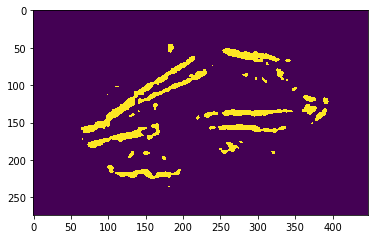

In [41]:
# This is what the mask looks like
plt.imshow(mask[1])
plt.show()
# Skeletonize the mask and display
#skeleton = skeletonize(mask[1])
#skeleton_med, distance = medial_axis(mask[1], return_distance=True)
#dist_on_skel = distance * skeleton_med
#plt.imshow(skeleton)
#plt.show()
#plt.imshow(dist_on_skel)
#plt.show()

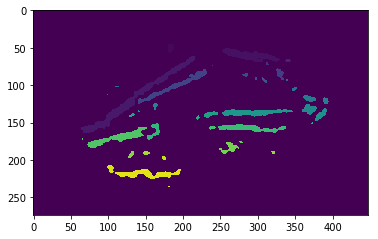

In [18]:
# now get the regions to be labeled and measured
img_label = label(mask[1])
plt.imshow(img_label)
regions = regionprops(img_label)

In [47]:
test = regions[1].coords
# probably should skeletonize this but needs to be binary....

ValueError: Image contains values other than 0 and 1